In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Equations from Bishop:


Prior considering zero-mean and isotropic Gaussian governed by a single precision parameter $\alpha$:
$$ p(\vec{w} \mid \alpha) = Norm(\vec{w} \mid \vec{0}, \alpha^{-1}\vec{I}) \tag{3.52}$$

corresponding posterior dist over w is given by
$$p(\vec{w} \mid \vec{t}) =  Norm(\vec{w} \mid \vec{m}_N, \vec{S}_N) \tag{3.49}$$
where

$$ \vec{m}_N = \vec{S}_N(\vec{S}_0^{-1}\vec{m}_0 + \beta\vec{\Phi}^T\vec{t}) \tag{3.50}$$
$$ \vec{S}^{-1}_N = \vec{S}_0^{-1} + \beta\vec{\Phi}^T\vec{\Phi} \tag{3.51}$$
<!-- $$ \vec{m}_N = \beta\vec{S}_N\vec{\Phi}^T\vec{t} \tag{3.53}$$
$$ \vec{S}^{-1}_N = \alpha\vec{I} + \beta\vec{\Phi}^T\vec{\Phi} \tag{3.54}$$ -->

Note: $\Phi$ is an N x M matrix (design matrix) whose elements are given by $\Phi_{nj} = \phi_{j}(x_n)$.

Also, likelihood is given by:

$$ p(\bold{t} \mid \bold{X}, \vec{w}, \beta) =\prod_{n=1}^{N} Norm(t_n \mid \vec{w}^T \vec{\phi}(\vec{x_n}), \beta^{-1})  \tag{3.10}$$


## Generating Sample Data

In [71]:
def generate_data(a_0, a_1, noise_sigma, X):
    N = len(X)
    noise = np.random.normal(0, noise_sigma, N)
    y = a_0 + a_1 * X + noise
    return y

In [ ]:
a_0 = -0.3
a_1 = 0.5   
noise_sigma = 0.2
beta = 1/noise_sigma**2
size = 100

alpha = 2.0
m0 = np.array([0, 0])
S0 = (1/alpha) * np.eye(2)

X = np.random.uniform(-1, 1, size)
y = generate_data(a_0, a_1, noise_sigma, X)

## Plot Posterior

In [127]:
def plotPosterior(X, y, m0, S0, beta, real_params, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    m0 = m0.reshape(m0.shape + (1,))
    phi = np.ones((len(X), 2))
    phi[:, 1] = X
    v_y = y.reshape(y.shape + (1,))

    # Equations 3.10 and 3.51
    SN = np.linalg.inv(np.linalg.inv(S0) + beta * phi.T.dot(phi))
    mN = SN.dot(np.linalg.inv(S0).dot(m0) + beta * phi.T.dot(v_y))

    # Equation 3.49
    posterior = multivariate_normal(mean=mN.flatten(), cov=SN)

    grid_x, grid_y = np.mgrid[-1:1:.01, -1:1:.01]
    pos = np.empty(grid_x.shape + (2,))
    pos[:, :, 0] = grid_x
    pos[:, :, 1] = grid_y

    ax.contourf(grid_x, grid_y, posterior.pdf(pos), 20)
    ax.set_xlabel('$w_0$')
    ax.set_ylabel('$w_1$')
    
    ax.scatter(real_params[0], real_params[1], marker='+', c='black', s=60)
    
    return mN, SN, posterior

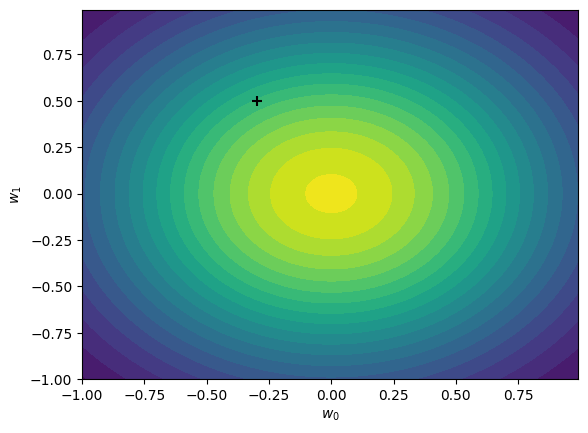

In [132]:
N=0
mN, sN, posterior = plotPosterior(X[0:N], y[0:N], m0, S0, beta, real_params=[a_0, a_1])

## Plot Likelihood

In [164]:
def plotLikelihood(X, y, beta, real_params, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    grid_x, grid_y = np.mgrid[-1:1:.01, -1:1:.01]
    pos = np.empty(grid_x.shape + (2,))
    pos[:, :, 0] = grid_x
    pos[:, :, 1] = grid_y

    likelihood = np.sqrt(beta/(2*np.pi))*(np.exp((-beta/2)*(X - grid_x - grid_y*y)**2))
    
    ax.contourf(grid_x, grid_y, likelihood, 20)
    ax.set_xlabel('$w_0$')
    ax.set_ylabel('$w_1$')

    ax.scatter(real_params[0], real_params[1], marker='+', c='black', s=60)
        
    # ax.set_title('Likelihood Distribution for Weight Parameters', fontsize=10)
    
    return likelihood

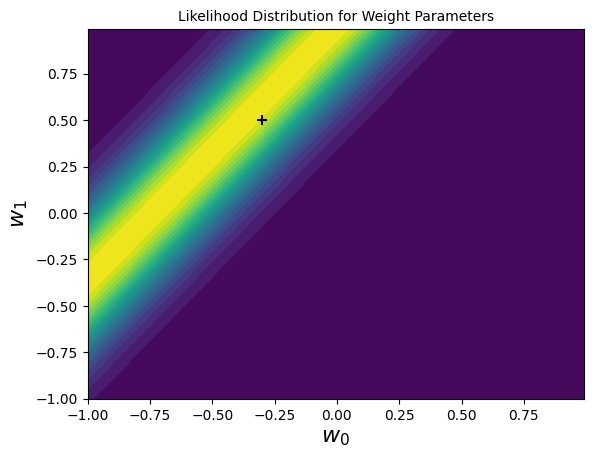

In [112]:
N=90
likelihood = plotLikelihood(X[N], y[N], beta, real_params=[a_0, a_1])

## Plot Data Space

In [176]:
def plotDataSpace(mN, SN, x=None, y=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    
    # Setup normal distributions from updated mean and SN
    coeff = np.random.multivariate_normal(mN.ravel(), SN, 6)
    
    space = np.linspace(-1, 1)
    
    for i in range(6):
        calc = coeff[i, 0] + coeff[i, 1]*space
        ax.plot(space, calc)
        ax.set_xlabel('w0')
        ax.set_ylabel('w1')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        
    if x is not None and y is not None:
        ax.scatter(x, y, facecolors='none', edgecolors='b')
        
    return ax        

<Axes: xlabel='w0', ylabel='w1'>

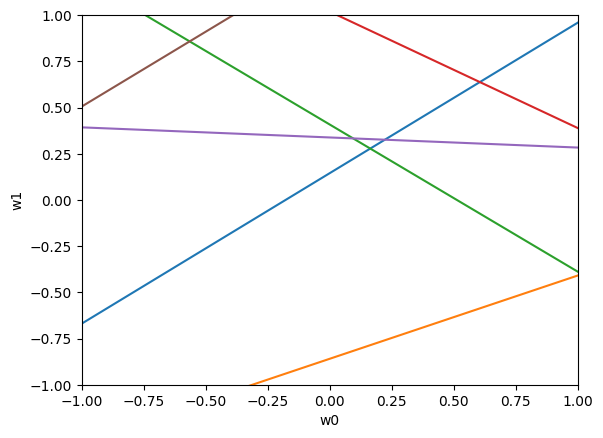

In [172]:
plotDataSpace(m0, S0, ax=plt.gca())

In [169]:
mN

array([[0.],
       [0.]])

## Altogether

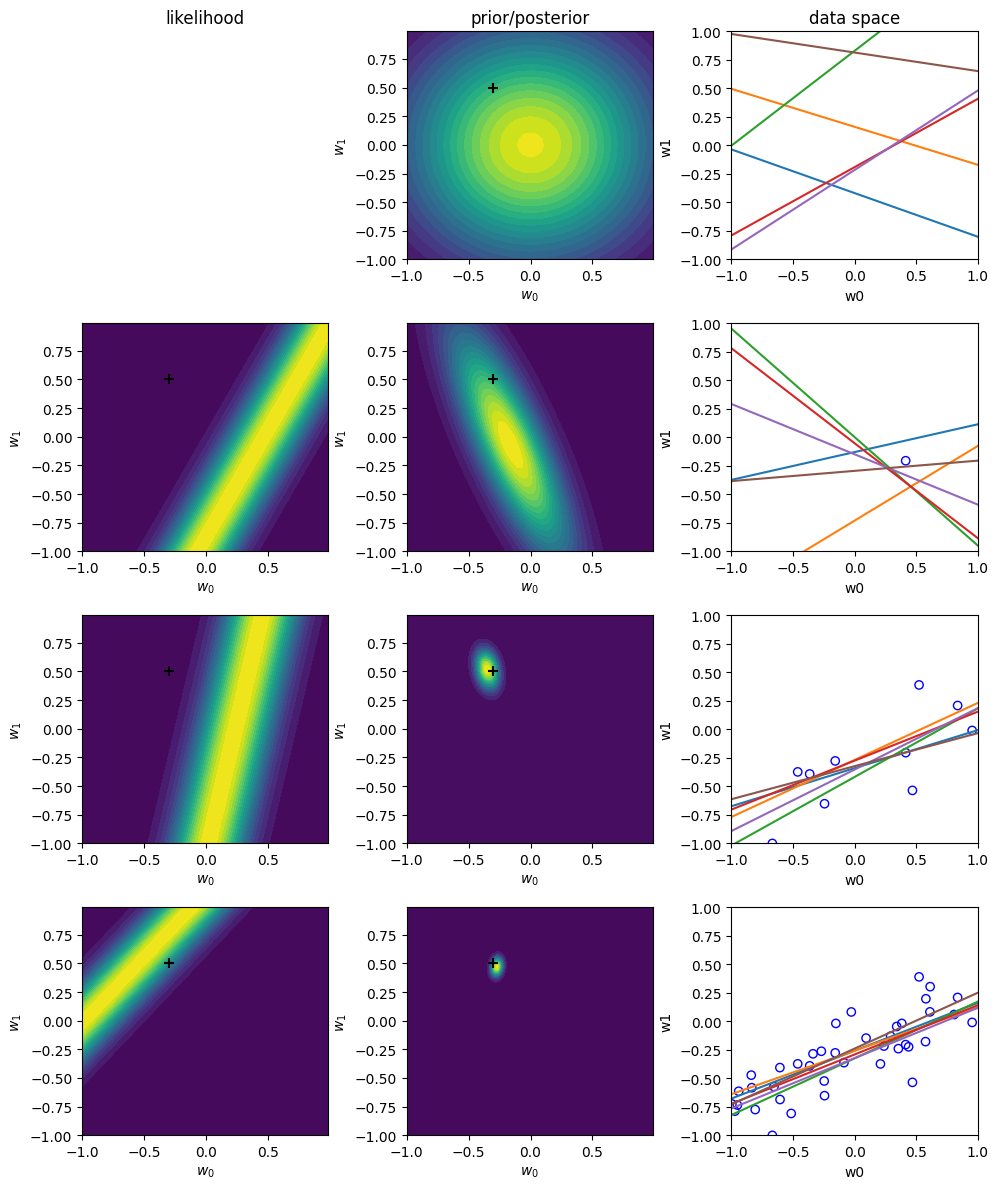

In [180]:
fig, ax = plt.subplots(4, 3, figsize=(10, 12))
# Setup Plot Space
ax[0, 0].set_title('likelihood')
ax[0, 1].set_title('prior/posterior')
ax[0, 2].set_title('data space')
ax[0, 0].axis('off')


mN, sN, _ = plotPosterior(X[0:0], y[0:0], m0, S0, beta, real_params=[a_0, a_1], ax=ax[0,1])
m1, s1, _ = plotPosterior(X[0:1], y[0:1], m0, S0, beta, real_params=[a_0, a_1], ax=ax[1,1])
m10, s10, _ = plotPosterior(X[0:10], y[0:10], m0, S0, beta, real_params=[a_0, a_1], ax=ax[2,1])
m40, s40, _ = plotPosterior(X[0:40], y[0:40], m0, S0, beta, real_params=[a_0, a_1], ax=ax[3,1])

_ = plotDataSpace(m0, S0, ax=ax[0,2])
_ = plotDataSpace(m1, s1, x=X[0:1], y=y[0:1], ax=ax[1,2])
_ = plotDataSpace(m10, s10, x=X[0:10], y=y[0:10], ax=ax[2,2])
_ = plotDataSpace(m40, s40, x=X[0:40], y=y[0:40], ax=ax[3,2])


_ = plotLikelihood(X[1], y[1], beta, real_params=[a_0, a_1], ax=ax[1,0])
_ = plotLikelihood(X[10], y[10], beta, real_params=[a_0, a_1], ax=ax[2,0])
_ = plotLikelihood(X[40], y[40], beta, real_params=[a_0, a_1], ax=ax[3,0])

fig.tight_layout()